# Evaluate with Special Cases

- typhoon Malakas (2016/0918 ~ 2016-09-18)

In [16]:
# Load library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xpath = '../data/qpesums_encoded'
ypath = '../examples/data/t1hr.csv'

# Load Precipitations
ys = pd.read_csv(ypath)
print(ys.shape)

# Pick date
ty16idx = (ys.date>=2016070600)&(ys.date<=2016100623)
ys_malakas = ys.loc[ty16idx,:]
print(ys_malakas.shape)
print(ys_malakas.head())

(35064, 46)
(2231, 46)
             date  C0A580  C0A970  466940  C0A540  C0A550  C0A9A0  C0AC60  \
30768  2016070601     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30769  2016070602     0.0     0.0     0.0     0.5     0.0     0.0     0.0   
30770  2016070603     0.0     0.0     0.0     0.0     0.0     0.0     NaN   
30771  2016070604     0.0     0.0     0.0     0.0     NaN     0.0     0.0   
30772  2016070605     0.0     0.0     0.0     NaN     0.0     0.0     NaN   

       C0A870  466920  ...  C0A9I1  C0AD50  C0A9B0  C0A560  C0A950  C0A940  \
30768     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30769     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30770     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
30771     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     NaN   
30772     0.0     0.0  ...     0.0     0.0     0.0     0.0     NaN     NaN   

       C0A570  C0A980  C0A9C0  C0AD40  
30768

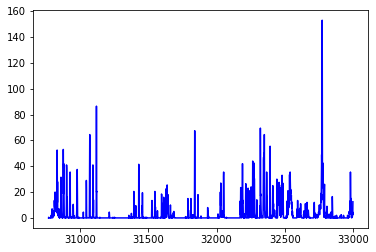

In [19]:
ymax = ys_malakas.iloc[:,1:].max(axis=1)
plt.plot(ymax, 'b-')
#plt.xticks(np.arange(0, len(ymax),20), ys_malakas['date'].iloc[np.arange(0, len(ymax),20)])
plt.show()